# Testing the LSTM Model

### GPU Availability Test

In [3]:
import tensorflow as tf
print("\n\nNum GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2025-07-15 22:37:13.002369: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-15 22:37:13.361751: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752619033.490206   29818 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752619033.529542   29818 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-15 22:37:13.834741: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr



Num GPUs Available:  1


### Test Dataset

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
test_df = pd.read_csv("Prepared-Data/test-data.csv")
test_df

,Target,Ham,Spam
0,LVIDA TRIP TO THAILAND!! Last day Tomorrow!! H...,0,1
1,RC120 Fullest-Get Fullest Talktime of Rs120 on...,0,1
2,E admin building there? I might b slightly ear...,1,0
3,"Aight no rush, I'll ask jay",1,0
4,"ItÛ÷s reassuring, in this crazy world.",1,0
...,...,...,...
4883,Thanks for ve lovely wisheds. You rock,1,0
4884,Friday Releases Some fun movies releasing this...,0,1
4885,Y she dun believe leh? I tot i told her it's t...,1,0
4886,What time you think you'll have it? Need to kn...,1,0


### Importing Models and Predicting results

In [5]:
vectorizer = tf.keras.models.load_model("Models/Vectorizer-Models/spam_ham_text_vectorizer.keras")
vectorizer

I0000 00:00:1752619205.735629   29818 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


<TextVectorization name=text_vectorization_3, built=True>

In [6]:
model = tf.keras.models.load_model("Models/Predictive-Models/spam_ham_BiLstm.keras")
model

<Sequential name=sequential_2, built=True>

In [9]:
vectorized_text = vectorizer(test_df['Target'].values)
vectorized_text

<tf.Tensor: shape=(4888, 107), dtype=int64, numpy=
array([[6159,  566,    2, ...,    0,    0,    0],
       [5158, 7058, 7059, ...,    0,    0,    0],
       [ 304, 8530,    1, ...,    0,    0,    0],
       ...,
       [ 813,  201,  319, ...,    0,    0,    0],
       [  61,   72,    3, ...,    0,    0,    0],
       [2057, 5864, 1595, ...,    0,    0,    0]])>

In [11]:
result_arr = model.predict(vectorized_text)
result_arr

153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


array([[6.5247296e-10, 1.0000000e+00],
       [4.4643628e-18, 1.0000000e+00],
       [1.0000000e+00, 4.6998263e-11],
       ...,
       [1.0000000e+00, 2.4470346e-14],
       [1.0000000e+00, 1.1229733e-08],
       [2.0735554e-27, 1.0000000e+00]], dtype=float32)

In [34]:
predictions = (result_arr > 0.5).astype('int')
predictions

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [35]:
actual_values = test_df[test_df.columns[1:]].values
actual_values

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [40]:
accuracy = (predictions == actual_values).mean()

print(f"Model Accuracy: {accuracy * 100} %")

Model Accuracy: 98.15875613747954 %


## Result Evaluations

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [56]:
spam_true = test_df["Spam"].values
spam_pred = [pred[1] for pred in predictions] # Getting spam from predictions, (it was in index 1)

In [81]:
accuracy_score(spam_true, spam_pred)

0.9815875613747954

Text(77.92222222222227, 0.5, 'Actual Values')

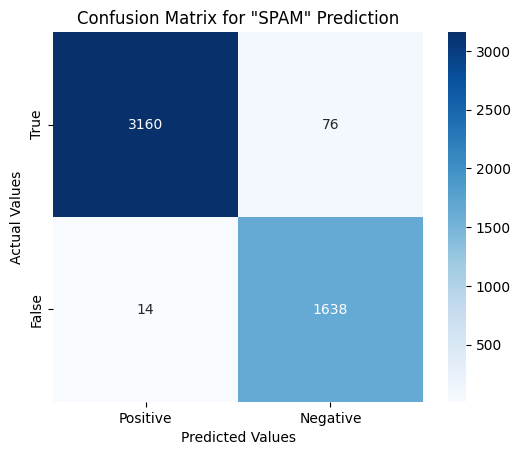

In [83]:
cfm = confusion_matrix(spam_true, spam_pred)

sns.heatmap(
    cfm, 
    annot=True, 
    cmap='Blues',
    fmt='.4g',
    square=True, 
    xticklabels=["Positive", "Negative"],
    yticklabels=["True", "False"],
)
plt.title('Confusion Matrix for "SPAM" Prediction')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

## Done!!
- Hence our **Long Short Term Memory (LSTM)** Models provides around ***98.15%*** accuracy on Test Dataset.